# DATA EXPLORATORY Analysis ON COVID CASES!

In [1]:
# What's going right now ! 
# We connect to https://opencovid.ca/api/ as an active API to fetch online data
import requests
import json
import numpy as np 
import matplotlib.pyplot as plt 
import datetime
import pandas as pd
import tensorflow as tf 
response = requests.get('https://api.opencovid.ca/')
data = json.loads(response.text)
data =response.json()

In [2]:
# Last update of the data! 
time = list(data.values())
Last_update = time[1]
print(Last_update)

2022-03-16 21:38 EDT


In [3]:
data_list = list(data.values())
data_dict = dict(data_list[0][0])
active_cases = data_dict['active_cases']
death = data_dict['deaths']
recovered = data_dict['recovered']
testing = data_dict['testing']
cases = data_dict['cases']
active_cases

104025

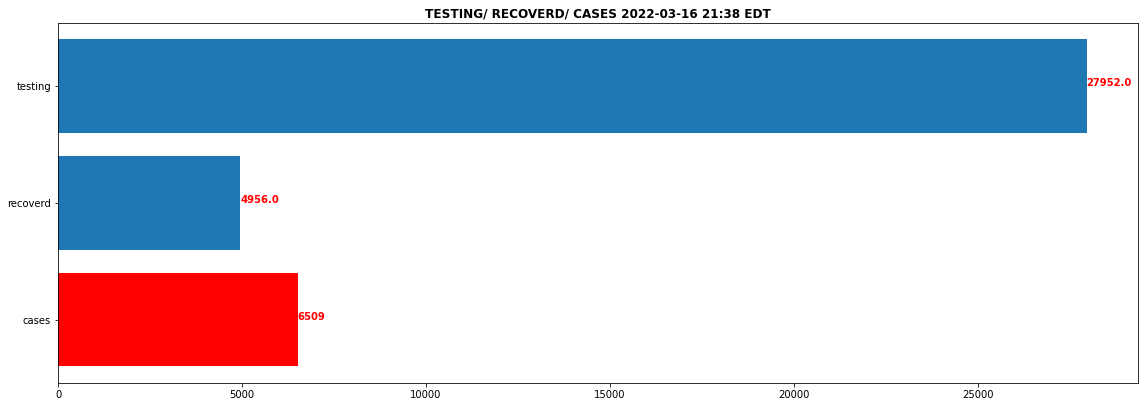

In [4]:
fig = plt.figure(figsize=(15,5))
ax = fig.add_axes([0,0,1,1])
leg = ['cases','recoverd','testing']
bar = [cases, recovered, testing ]
ax.barh(leg,bar)
ax.barh('cases',cases, color='red')
for i, v in enumerate(bar): 
    ax.text( v, i,str(v), color='red', fontweight = 'bold')

plt.title("TESTING/ RECOVERD/ CASES " + str(Last_update), fontweight = 'bold' )
plt.show()

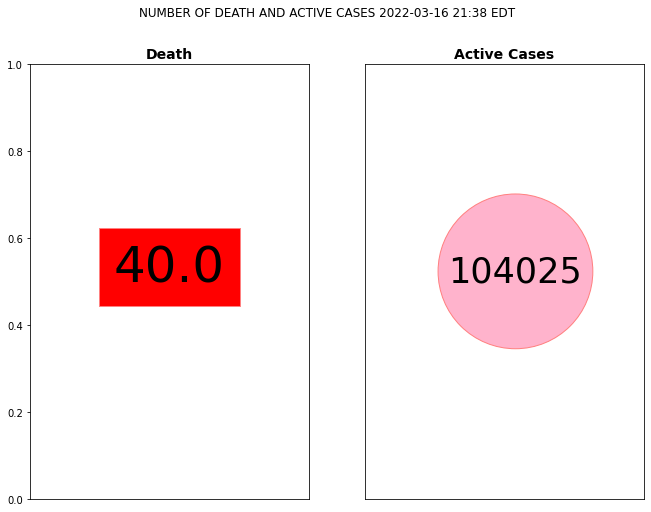

In [5]:
plt.figure(figsize=(11,8))
plt.suptitle("NUMBER OF DEATH AND ACTIVE CASES " +str (Last_update))
plt.subplot(1,2,1)
plt.text(0.3, 0.5, death, size=50,
         bbox=dict(boxstyle="square",
                   ec=(1., 0.5, 0.5),
                   fc=(1., 0, 0),
                   )
         )
plt.title('Death', fontweight='bold', fontsize = 14)
plt.xticks([])
plt.subplot(1,2,2)
plt.text(0.3, 0.5, active_cases, size=35,
         bbox=dict(boxstyle="circle",
                   ec=(1., 0.5, 0.5),
                   fc=(1., 0.7, 0.8),
                   )
         )
plt.title('Active Cases', fontweight='bold', fontsize = 14)
plt.xticks([])
plt.yticks([])
plt.show()

## Past X days in British Columbia, Canada 

In [6]:
from datetime import date, timedelta
NUMBER_DAYS = 750
PROVINCE = "BC"
today_date = date.today().isoformat()
days_before  =  (date.today() - timedelta(days=NUMBER_DAYS)).isoformat()
response_BC = requests.get("https://api.opencovid.ca/timeseries?stat=cases&loc="+PROVINCE+"&after=" + str(days_before) + "&before=" +str(today_date))
data_BC = json.loads(response_BC.text)
data_BC = response_BC.json()

# WORKING WITH LIST OF DATA !
data_prov_BC = list(data_BC.values())
days = []
for i in range (NUMBER_DAYS): 
    days.append(data_prov_BC[0][i])

cases = [] 
dates=[]
for i in range(NUMBER_DAYS): 
    if days[i]['cases'] != 0 :
        cases.append(days[i]['cases'])
        dates.append(days[i]['date_report'])

cases_df = pd.DataFrame(cases, dates)
cases_df = cases_df.rename(columns={0: "NUMBER OF CASES BC"})
cases_df


,NUMBER OF CASES BC
29-02-2020,1
03-03-2020,4
04-03-2020,1
05-03-2020,8
07-03-2020,6
...,...
09-03-2022,274
10-03-2022,336
11-03-2022,288
14-03-2022,689


In [7]:
# From some days we have no cases ! that is because in those dates we have no testing and report. So we drop those 0 values ! 
cases_df.drop(cases_df.index[cases_df['NUMBER OF CASES BC'] == 0], inplace=True)

In [8]:
# Maximum number of cases!
max_df = cases_df.loc[cases_df["NUMBER OF CASES BC"] == cases_df.max(axis=0)[0]]
# Minimum number of cases! 
min_df  = cases_df.loc[cases_df["NUMBER OF CASES BC"] == cases_df.min(axis=0)[0]]
max_df, min_df

(            NUMBER OF CASES BC
 03-01-2022                9332,
             NUMBER OF CASES BC
 29-02-2020                   1
 04-03-2020                   1
 05-06-2020                   1
 03-08-2020                   1
 22-08-2020                   1)

In [9]:
max_df.index[0], min_df.index[0]

('03-01-2022', '29-02-2020')

In [10]:
max_df["NUMBER OF CASES BC"][0], min_df["NUMBER OF CASES BC"][0] 

(9332, 1)

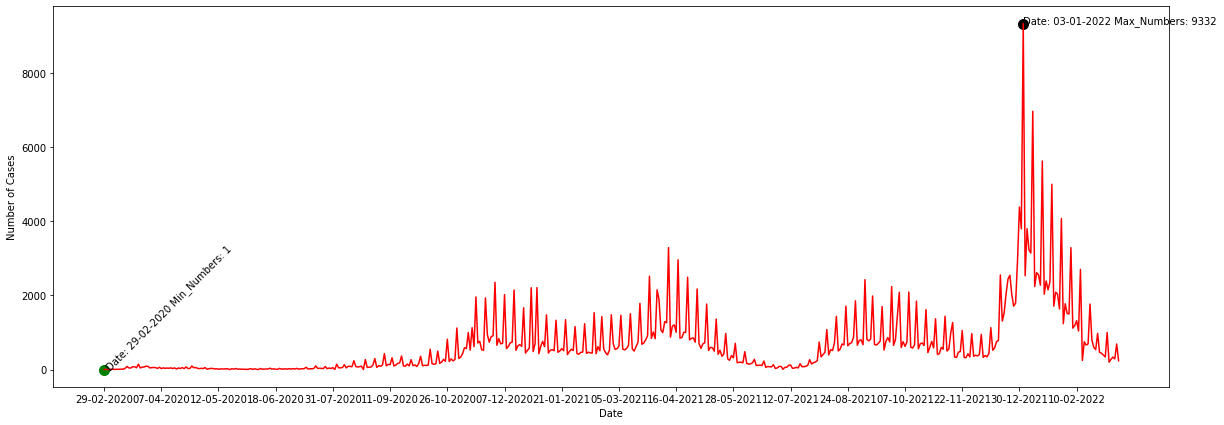

In [11]:
plt.figure(figsize=(20,7))
plt.plot(cases_df, color = "red")
plt.scatter(x = max_df.index[0], y = max_df["NUMBER OF CASES BC"][0], s=100, color="black")
max_title = "Date: " + str(max_df.index[0]) + " Max_Numbers: " +str(max_df["NUMBER OF CASES BC"][0])
plt.annotate(max_title, [max_df.index[0], max_df["NUMBER OF CASES BC"][0]])
plt.scatter(x = min_df.index[0], y =  min_df["NUMBER OF CASES BC"][0], s=100, color = 'Green')
min_title = "Date: " + str(min_df.index[0]) + " Min_Numbers: " + str(min_df["NUMBER OF CASES BC"][0])
plt.annotate(min_title,[min_df.index[0], min_df["NUMBER OF CASES BC"][0]], rotation=45)
plt.xticks(cases_df.index[0:-1:30])
plt.xlabel("Date")
plt.ylabel("Number of Cases")
plt.show()

<AxesSubplot:>

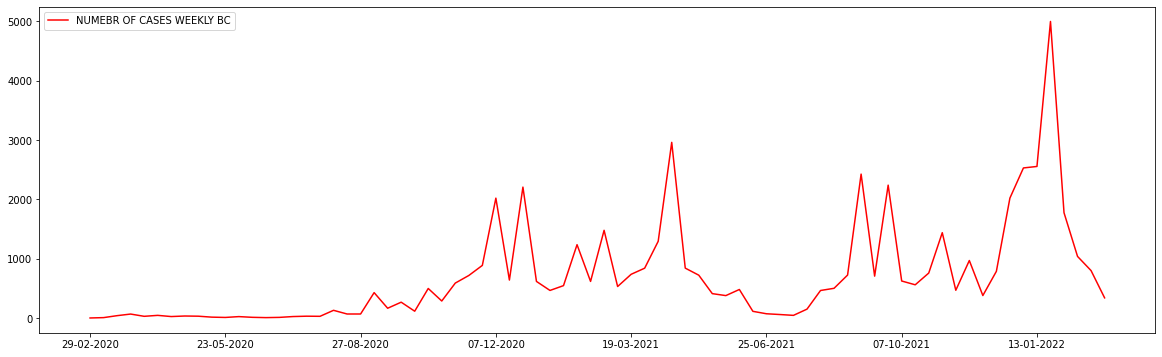

In [12]:
y = cases_df[0:-1:7]
weekly = y.rename(columns={"NUMBER OF CASES BC": "NUMEBR OF CASES WEEKLY BC"})
weekly.plot(figsize= (20,6), color="red")

## First step spilit data to Train and Test 
it's important to consider we cannot split data to train/test randomly. In time series data we need to consider a random point of the time and everything before that time consider as train and everything after that point consider as test 

In [13]:
# we consider the first split_percentage of size of the dataset as training
SPLIT_PERC = 0.7  
split_size = int(SPLIT_PERC * len(cases_df))
time_span_train = dates[:split_size]
num_case_train = cases[:split_size]
x_train, y_train  = time_span_train, num_case_train
x_test, y_test = dates[split_size:], cases[split_size:]
len(x_train), len(x_test), len(y_train), len(y_test)

(373, 160, 373, 160)

C:\Users\hamid\AppData\Local\Temp\ipykernel_13384\2778730608.py:5: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  plt.xticks([])


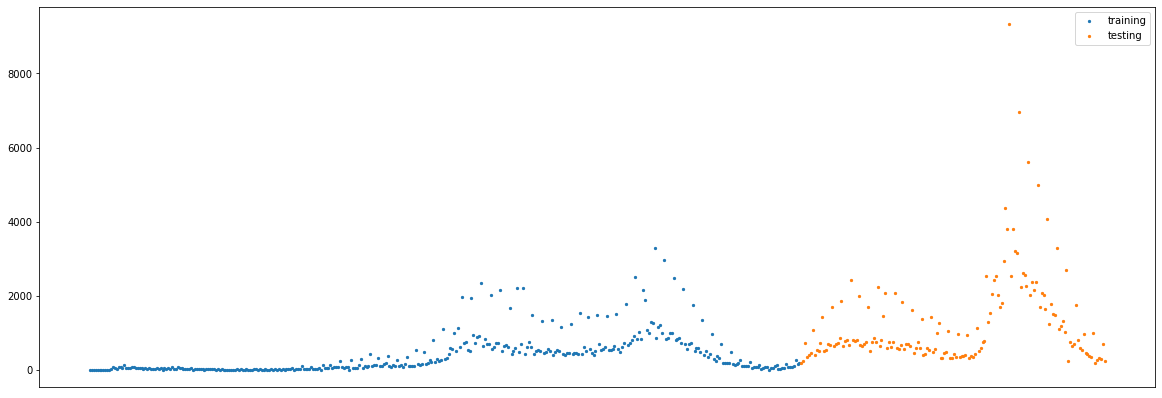

In [14]:
plt.figure(figsize=(20,7))
plt.scatter(x=x_train, y=y_train, s=5, label = "training")
plt.scatter(x=x_test, y=y_test, s=5, label = "testing")
plt.legend()
plt.xticks([])
plt.show()

# Turn time seris to supervised learning by windowing 

In [15]:
# Need a function to create a window and horizon 
# window_size is the number of days of data that we consider and horizon is the number of days that we want to predict. 
# Tensorflow make our job easier, by offereing tf.keras.utils.timeseries_dataset_from_array 
# https://www.tensorflow.org/api_docs/python/tf/keras/utils/timeseries_dataset_from_array 
# https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/sequence/TimeseriesGenerator
# These functions take in a sequence of data-points gathered at equal intervals, along with time series parameters such 
# as length of the sequences/windows, spacing between two sequence/windows, etc., to produce batches of timeseries inputs and targets.

In [16]:
# so for the review we have data (cases), and dates(time) as: 
dates[0:7], cases[0:7], len(dates), len(cases), type(dates), type(cases)

(['29-02-2020',
  '03-03-2020',
  '04-03-2020',
  '05-03-2020',
  '07-03-2020',
  '09-03-2020',
  '10-03-2020'],
 [1, 4, 1, 8, 6, 5, 7],
 533,
 533,
 list,
 list)

In [17]:
dates

['29-02-2020',
 '03-03-2020',
 '04-03-2020',
 '05-03-2020',
 '07-03-2020',
 '09-03-2020',
 '10-03-2020',
 '11-03-2020',
 '12-03-2020',
 '13-03-2020',
 '14-03-2020',
 '16-03-2020',
 '17-03-2020',
 '18-03-2020',
 '19-03-2020',
 '20-03-2020',
 '21-03-2020',
 '23-03-2020',
 '24-03-2020',
 '25-03-2020',
 '26-03-2020',
 '27-03-2020',
 '28-03-2020',
 '30-03-2020',
 '31-03-2020',
 '01-04-2020',
 '02-04-2020',
 '03-04-2020',
 '04-04-2020',
 '06-04-2020',
 '07-04-2020',
 '08-04-2020',
 '09-04-2020',
 '10-04-2020',
 '11-04-2020',
 '13-04-2020',
 '14-04-2020',
 '15-04-2020',
 '16-04-2020',
 '17-04-2020',
 '18-04-2020',
 '20-04-2020',
 '21-04-2020',
 '22-04-2020',
 '23-04-2020',
 '24-04-2020',
 '25-04-2020',
 '27-04-2020',
 '28-04-2020',
 '29-04-2020',
 '30-04-2020',
 '01-05-2020',
 '02-05-2020',
 '04-05-2020',
 '05-05-2020',
 '06-05-2020',
 '07-05-2020',
 '08-05-2020',
 '09-05-2020',
 '11-05-2020',
 '12-05-2020',
 '13-05-2020',
 '14-05-2020',
 '15-05-2020',
 '16-05-2020',
 '18-05-2020',
 '19-05-20

In [18]:
import tensorflow as tf 
from keras.preprocessing.sequence import TimeseriesGenerator
# """
# tf.keras.utils.timeseries_dataset_from_array(
#     data, targets, sequence_length, sequence_stride=1, sampling_rate=1,
#     batch_size=128, shuffle=False, seed=None, start_index=None, end_index=None)
# """

# need to turn data to numpy array 
inputs   = np.array(dates)
labels = tf.constant(cases)

# we want to predict next day cases, by considerting past 7 days.
dataset = TimeseriesGenerator(inputs, labels, length=7, shuffle=False, stride=1, batch_size=1)


In [24]:
for i in dataset: 
    print(i)

(array([['29-02-2020', '03-03-2020', '04-03-2020', '05-03-2020',
        '07-03-2020', '09-03-2020', '10-03-2020']], dtype='<U10'), array([7]))
(array([['03-03-2020', '04-03-2020', '05-03-2020', '07-03-2020',
        '09-03-2020', '10-03-2020', '11-03-2020']], dtype='<U10'), array([7]))
(array([['04-03-2020', '05-03-2020', '07-03-2020', '09-03-2020',
        '10-03-2020', '11-03-2020', '12-03-2020']], dtype='<U10'), array([11]))
(array([['05-03-2020', '07-03-2020', '09-03-2020', '10-03-2020',
        '11-03-2020', '12-03-2020', '13-03-2020']], dtype='<U10'), array([9]))
(array([['07-03-2020', '09-03-2020', '10-03-2020', '11-03-2020',
        '12-03-2020', '13-03-2020', '14-03-2020']], dtype='<U10'), array([30]))
(array([['09-03-2020', '10-03-2020', '11-03-2020', '12-03-2020',
        '13-03-2020', '14-03-2020', '16-03-2020']], dtype='<U10'), array([83]))
(array([['10-03-2020', '11-03-2020', '12-03-2020', '13-03-2020',
        '14-03-2020', '16-03-2020', '17-03-2020']], dtype='<U10'), a

In [34]:
dataset[-8]

(array([['04-03-2022', '07-03-2022', '08-03-2022', '09-03-2022',
         '10-03-2022', '11-03-2022', '14-03-2022']], dtype='<U10'),
 array([237]))

In [35]:
# The first 10 windows 
for i in range(10): 
    print(dataset[i])

(array([['29-02-2020', '03-03-2020', '04-03-2020', '05-03-2020',
        '07-03-2020', '09-03-2020', '10-03-2020']], dtype='<U10'), array([7]))
(array([['03-03-2020', '04-03-2020', '05-03-2020', '07-03-2020',
        '09-03-2020', '10-03-2020', '11-03-2020']], dtype='<U10'), array([7]))
(array([['04-03-2020', '05-03-2020', '07-03-2020', '09-03-2020',
        '10-03-2020', '11-03-2020', '12-03-2020']], dtype='<U10'), array([11]))
(array([['05-03-2020', '07-03-2020', '09-03-2020', '10-03-2020',
        '11-03-2020', '12-03-2020', '13-03-2020']], dtype='<U10'), array([9]))
(array([['07-03-2020', '09-03-2020', '10-03-2020', '11-03-2020',
        '12-03-2020', '13-03-2020', '14-03-2020']], dtype='<U10'), array([30]))
(array([['09-03-2020', '10-03-2020', '11-03-2020', '12-03-2020',
        '13-03-2020', '14-03-2020', '16-03-2020']], dtype='<U10'), array([83]))
(array([['10-03-2020', '11-03-2020', '12-03-2020', '13-03-2020',
        '14-03-2020', '16-03-2020', '17-03-2020']], dtype='<U10'), a

In [36]:
# the last 10 windows ! 
for i in range (10): 
    print(dataset[i-10])

(array([['02-03-2022', '03-03-2022', '04-03-2022', '07-03-2022',
        '08-03-2022', '09-03-2022', '10-03-2022']], dtype='<U10'), array([288]))
(array([['03-03-2022', '04-03-2022', '07-03-2022', '08-03-2022',
        '09-03-2022', '10-03-2022', '11-03-2022']], dtype='<U10'), array([689]))
(array([['04-03-2022', '07-03-2022', '08-03-2022', '09-03-2022',
        '10-03-2022', '11-03-2022', '14-03-2022']], dtype='<U10'), array([237]))
(array([], shape=(1, 0), dtype='<U10'), array([1]))
(array([], shape=(1, 0), dtype='<U10'), array([4]))
(array([], shape=(1, 0), dtype='<U10'), array([1]))
(array([], shape=(1, 0), dtype='<U10'), array([8]))
(array([], shape=(1, 0), dtype='<U10'), array([6]))
(array([], shape=(1, 0), dtype='<U10'), array([5]))
(array([], shape=(1, 0), dtype='<U10'), array([7]))
